In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions
from Bio.PDB.Polypeptide import one_to_three
from Bio.PDB.Polypeptide import three_to_one
from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
# from small_script.myFunctions import *
sys.path.insert(0, "/Users/weilu/openmmawsem")
from helperFunctions.myFunctions import *
from collections import defaultdict
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = np.array([16.18033, 10])    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 22})

In [3]:
# pre = "/Users/weilu/Research/server_backup/feb_2019/jan_optimization/gammas/"
# pre = "/Users/weilu/Research/server/april_2019/optimization_test/gammas/"
pre = "/Users/weilu/Research/server/sep_2019/peptide_optimization_trial_2/optimization/gammas/"
# pp = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0"
# pp = "proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
pp = f"protein_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"

A_name = pp + "_A"
B_name = pp + "_B"
B_filtered_name = pp + "_B_filtered"
P_name = pp + "_P"
Gamma_name = pp + "_gamma"
Gamma_filtered_name = pp + "_gamma_filtered"
Lamb_name = pp + "_lamb"
Lamb_filtered_name = pp + "_lamb_filtered"

A = np.loadtxt(pre+A_name)
B = np.loadtxt(pre+B_name)
B_filtered = np.loadtxt(pre+B_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Gamma = np.loadtxt(pre+Gamma_name)
Gamma_filtered = np.loadtxt(pre+Gamma_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Lamb = np.loadtxt(pre+Lamb_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Lamb_filtered = np.loadtxt(pre+Lamb_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})

half_B_name = pp + "_half_B"
half_B = np.loadtxt(pre+half_B_name)
other_half_B_name = pp + "_other_half_B"
other_half_B = np.loadtxt(pre+other_half_B_name)
std_half_B_name = pp + "_std_half_B"
std_half_B = np.loadtxt(pre+std_half_B_name)


# pre = "/Users/weilu/Research/server/april_2019/"
location = pre + "../../phis/protein_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0_phi_decoy_summary.txt"
A_prime = np.loadtxt(location)





/Users/weilu/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


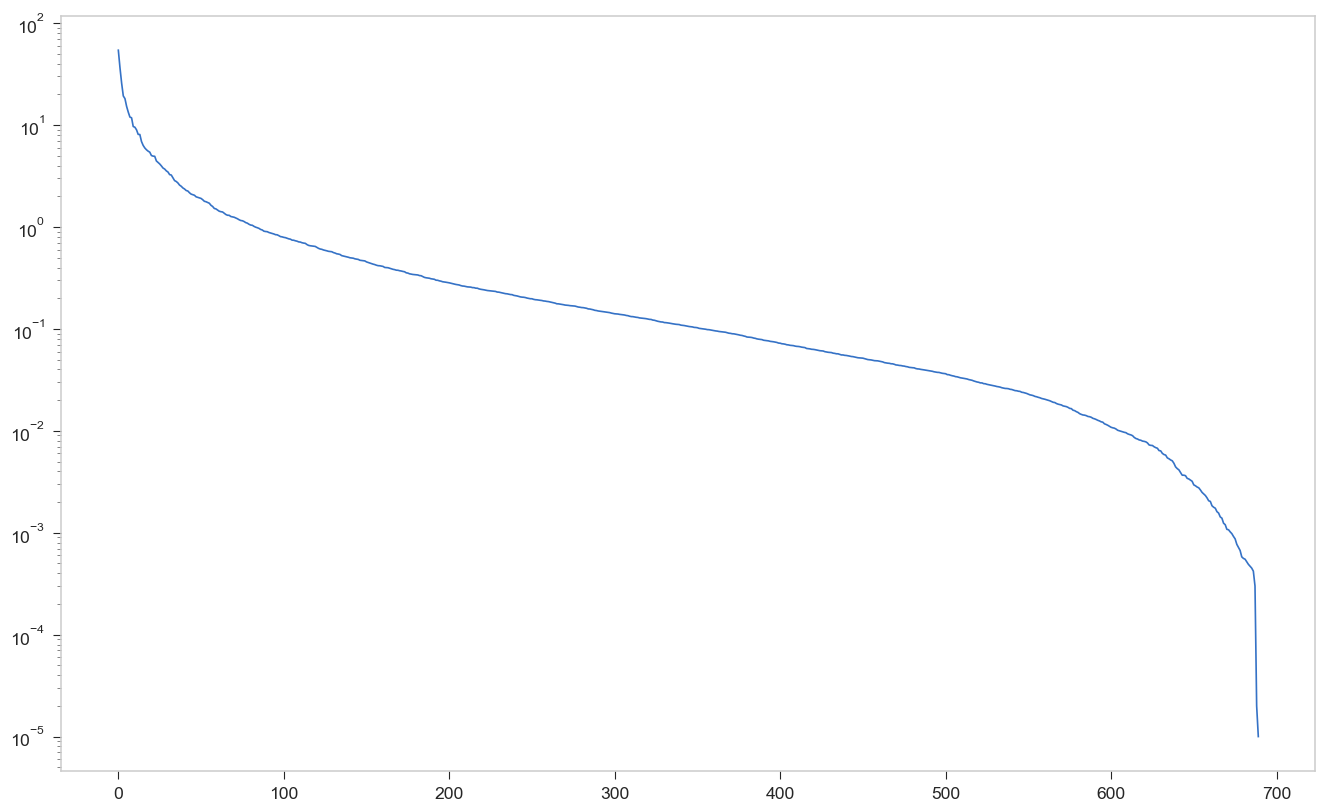

In [4]:
plt.plot(Lamb)
plt.yscale("log")

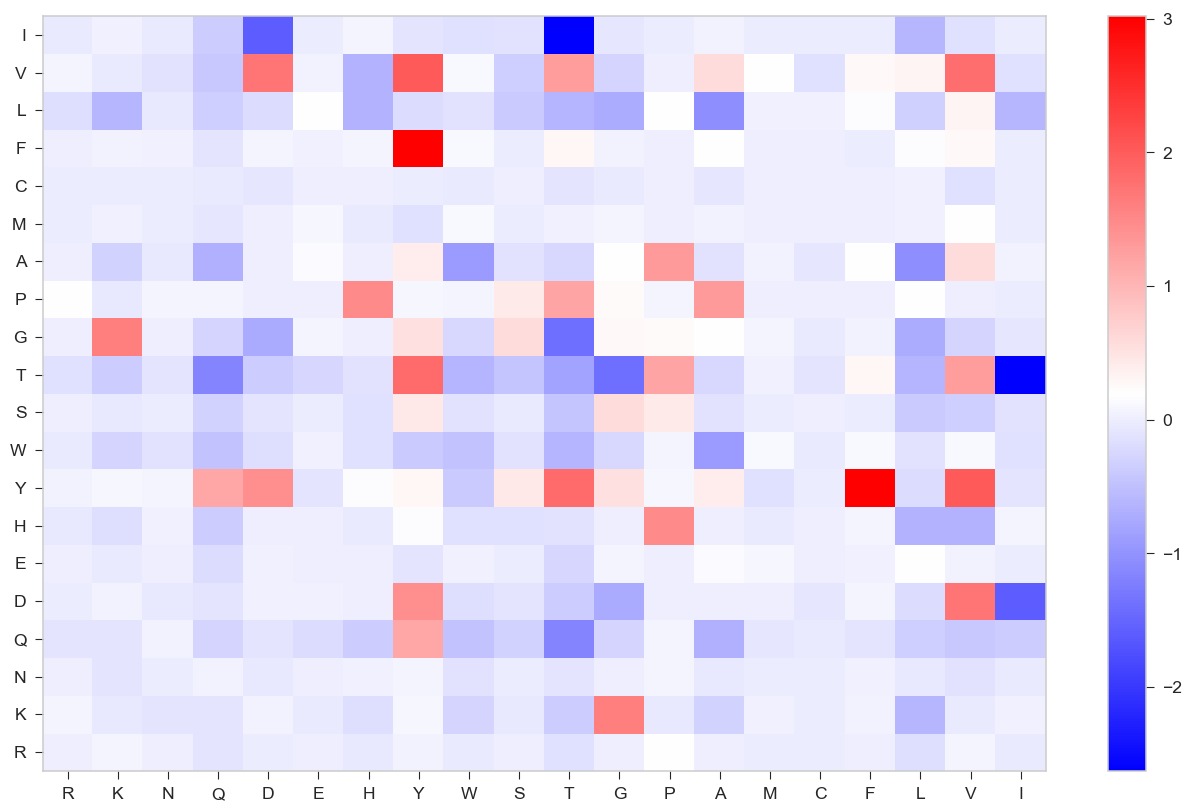

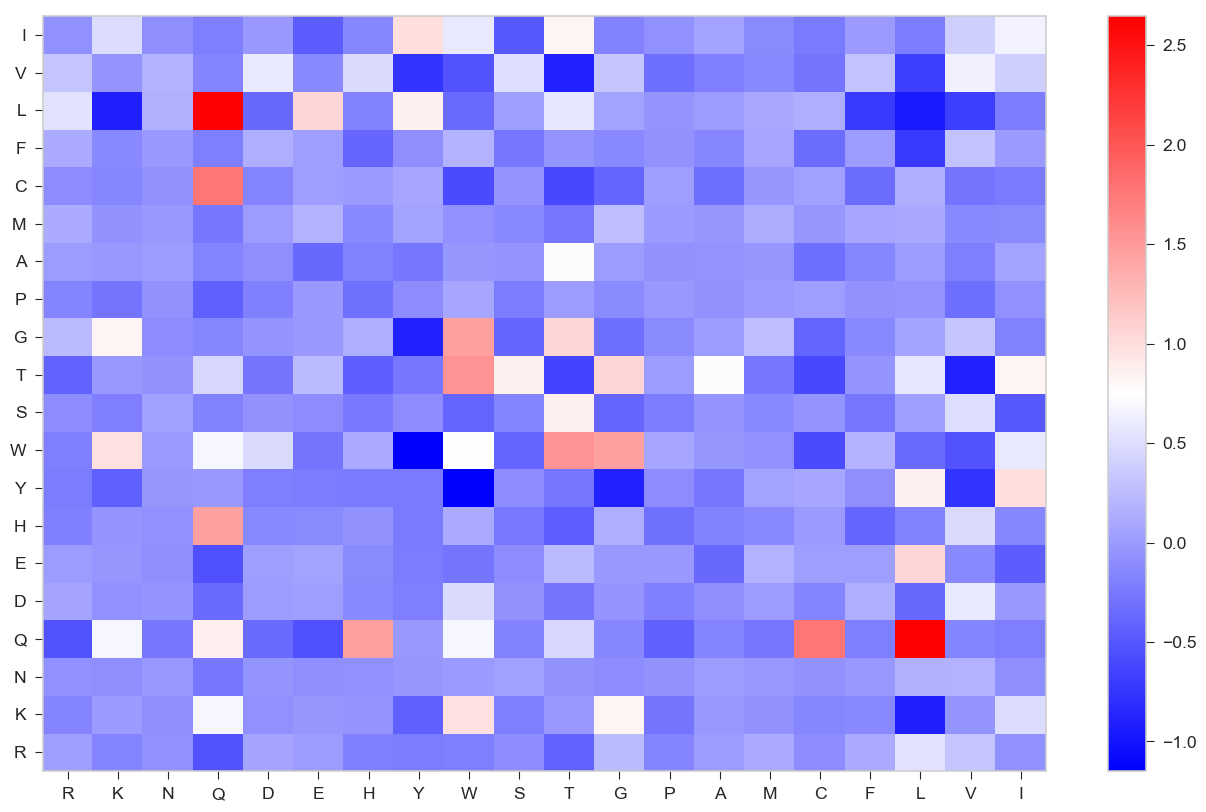

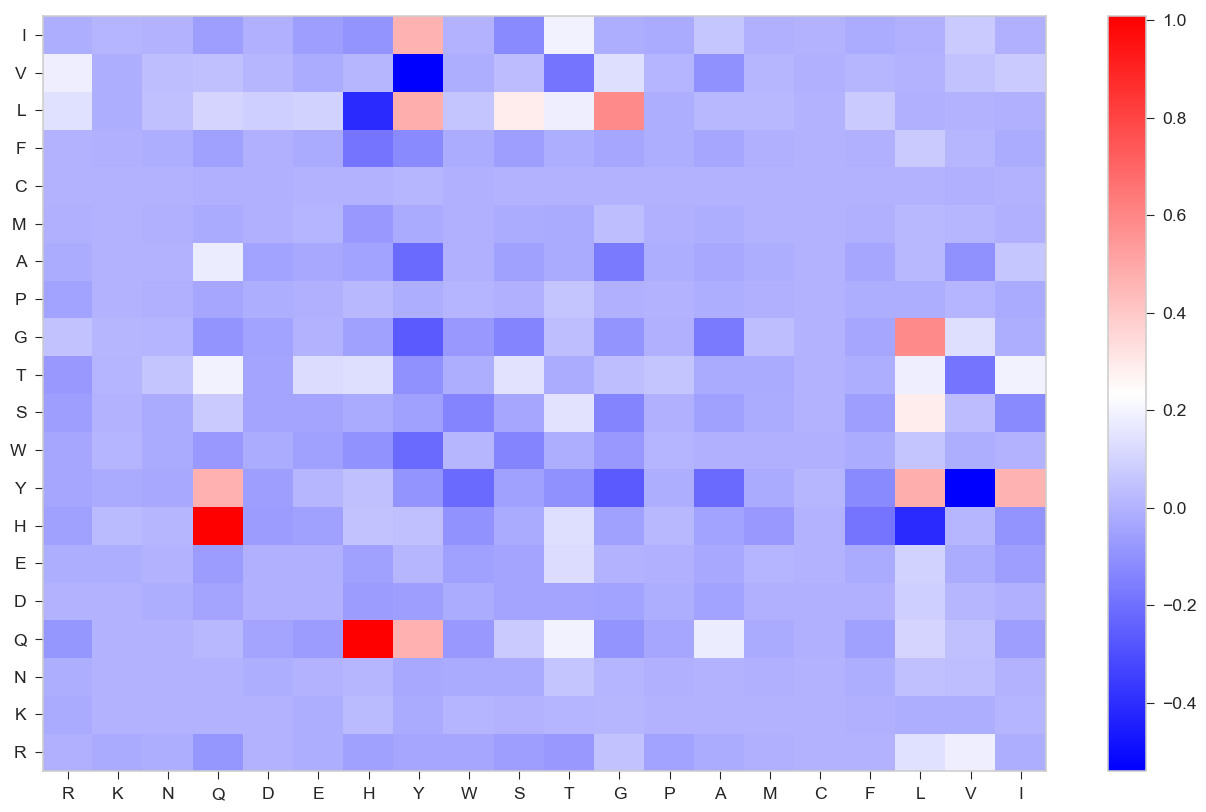

In [5]:
lamb, P = np.linalg.eig(B)
lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)
filtered_lamb = np.copy(lamb)
cutoff_mode = 100
filtered_B_inv, filtered_lamb, P = get_filtered_B_inv_lambda_and_P(filtered_lamb, 
                                                                   cutoff_mode, P)
filtered_gamma = np.dot(filtered_B_inv, A)
filtered_B = np.linalg.inv(filtered_B_inv)
plot_contact_well(filtered_gamma[:210], inferBound=True)
plot_contact_well(filtered_gamma[210:420], inferBound=True)
plot_contact_well(filtered_gamma[420:], inferBound=True)

In [6]:
# maximum difference between loaded and computed is 1e-5.
max(lamb-Lamb)

(1.5403101476740844e-05+0j)

In [6]:
save_gamma_pre = "/Users/weilu/Research/server/sep_2019/saved_gammas/"
np.savetxt(f"{save_gamma_pre}/trial_2_cutoff100", filtered_gamma)

In [107]:
os.chdir('/Users/weilu/opt/notebook/Optimization')

'/Users/weilu/opt/notebook/Optimization'

In [7]:
os.chdir("/Users/weilu/Research/server/sep_2019/peptide_optimization_trial_2/optimization/")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
gamma_file_name = "/Users/weilu/Research/server/sep_2019/saved_gammas/trial_2_cutoff100"
data = validate_hamiltonian_wei("phi_list.txt", "protein_list_small", gamma_file_name, "shuffle", 1000, mode=0)
data


210
420
60
0 13.88620325483512
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1BD2_1,13.886203,-94.019049,27.959737,8.784171
1,6BJ8_1,13.109063,-135.224251,-11.309544,9.452598
2,2JCC_1,14.473569,-126.328556,-5.647334,8.338042
3,1AO7_1,13.484683,-157.616608,-29.399574,9.508346
4,1LP9_1,15.189795,-102.871840,16.266549,7.843318
5,3QDJ_1,12.256285,-143.183898,-11.627734,10.733771
6,3GSN_1,13.845688,-112.105952,6.630968,8.575733
7,1QRN_1,15.372893,-166.795586,-39.143784,8.303694
8,3PWP_1,14.576827,-157.595679,-29.193631,8.808642
9,5W1W_1,13.829302,-133.125454,-9.536536,8.936743


In [9]:
gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/original_gamma"
original_gamma = np.loadtxt(gamma_file_name)

In [10]:
np.dot(A_prime, original_gamma)

-559.5053481482374

In [11]:
# we want to impose additional contraint so that A' * gamma = constnat.(-562.23)
c = np.dot(A_prime, original_gamma)
B_inv = filtered_B_inv
lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime) )
gamma_new = B_inv.dot(A-A_prime*lambda_2)

In [12]:
np.dot(A_prime, gamma_new)

-559.5053481482373

In [13]:
# impose A'gamma
save_gamma_pre = "/Users/weilu/Research/server/sep_2019/saved_gammas/"
np.savetxt(f"{save_gamma_pre}/trial_2_cutoff100_impose_Aprime_constraint", gamma_new)

In [14]:
os.chdir("/Users/weilu/Research/server/sep_2019/peptide_optimization_trial_2/optimization/")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/cutoff100"
gamma_file_name = "/Users/weilu/Research/server/sep_2019/saved_gammas/trial_2_cutoff100_impose_Aprime_constraint"

data = validate_hamiltonian_wei("phi_list.txt", "protein_list_small", gamma_file_name, "shuffle", 1000, mode=0)
data


210
420
60
0 13.868354956091665
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1BD2_1,13.868355,-639.603610,-517.600844,8.797205
1,6BJ8_1,13.214237,-685.448865,-561.149639,9.406463
2,2JCC_1,14.328149,-670.129342,-548.402985,8.495609
3,1AO7_1,13.420110,-706.276085,-577.483215,9.597005
4,1LP9_1,15.159616,-639.190366,-518.061142,7.990257
5,3QDJ_1,11.999585,-698.554403,-566.255907,11.025256
6,3GSN_1,13.539900,-668.190557,-547.916753,8.882917
7,1QRN_1,15.249483,-705.064741,-577.848954,8.342301
8,3PWP_1,14.563373,-708.209283,-578.403614,8.913160
9,5W1W_1,13.633887,-665.151214,-541.722978,9.053048


In [16]:
os.chdir("/Users/weilu/Research/server/sep_2019/peptide_optimization/optimization/")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/cutoff100"
gamma_file_name = "/Users/weilu/Research/server/sep_2019/saved_gammas/trial_2_cutoff100_impose_Aprime_constraint"

data = validate_hamiltonian_wei("phi_list.txt", "protein_list_tiny", gamma_file_name, "shuffle", 1000, mode=0)
data


210
420
60
0 8.849450826769093
210
420
60
210
420
60
210
420
60
210
420
60


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1,8.849451,-672.109604,-598.080169,8.365427
1,2,9.270943,-681.915179,-611.143850,7.633671
2,3,8.089534,-645.301463,-578.332365,8.278486
3,4,8.240793,-671.306528,-606.010473,7.923516
4,5,7.439003,-645.968912,-584.637773,8.244537


In [22]:
# mix gammas so that we don't overfitting too much.
gamma_file_name = "/Users/weilu/Research/server/sep_2019/saved_gammas/original_gamma"
original_gamma = np.loadtxt(gamma_file_name)
gamma_file_name = "/Users/weilu/Research/server/sep_2019/saved_gammas/trial_2_cutoff100_impose_Aprime_constraint"
gamma_new = np.loadtxt(gamma_file_name)

alpha = 0.8
alpha_percent = int(alpha*100)
mixed_gamma = alpha*original_gamma + (1-alpha)*gamma_new
save_gamma_pre = "/Users/weilu/Research/server/sep_2019/saved_gammas/"
np.savetxt(f"{save_gamma_pre}/trial_2_mixed_original_and_cutoff100_impose_Aprime_constraint_{alpha_percent}", mixed_gamma)

In [23]:
os.chdir("/Users/weilu/Research/server/sep_2019/peptide_optimization_trial_2/optimization/")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/cutoff100"
gamma_file_name = "/Users/weilu/Research/server/sep_2019/saved_gammas/trial_2_mixed_original_and_cutoff100_impose_Aprime_constraint_80"

data = validate_hamiltonian_wei("phi_list.txt", "protein_list_small", gamma_file_name, "shuffle", 1000, mode=0)
data


210
420
60
0 4.644053322015458
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1BD2_1,4.644053,-580.211577,-550.187949,6.464962
1,6BJ8_1,3.644353,-584.591439,-557.302772,7.487932
2,2JCC_1,3.595958,-596.931478,-571.579622,7.050099
3,1AO7_1,3.888880,-585.161512,-555.292123,7.680717
4,1LP9_1,3.343277,-585.803512,-561.447871,7.284961
5,3QDJ_1,4.780158,-578.779196,-548.984082,6.233082
6,3GSN_1,3.760090,-570.671920,-541.173748,7.845071
7,1QRN_1,4.093077,-585.305336,-559.627225,6.273547
8,3PWP_1,3.828864,-598.379609,-570.653536,7.241332
9,5W1W_1,4.471712,-583.760125,-554.346778,6.577648


In [18]:
os.chdir("/Users/weilu/Research/server/sep_2019/peptide_optimization_trial_2/optimization/")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/cutoff100"
gamma_file_name = "/Users/weilu/Research/server/sep_2019/saved_gammas/trial_2_mixed_original_and_cutoff100_impose_Aprime_constraint_95"

data = validate_hamiltonian_wei("phi_list.txt", "protein_list_small", gamma_file_name, "shuffle", 1000, mode=0)
data


210
420
60
0 1.721204322270767
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1BD2_1,1.721204,-569.075571,-556.298031,7.423604
1,6BJ8_1,1.069227,-565.680672,-556.581484,8.510059
2,2JCC_1,0.915701,-583.206879,-575.925241,7.951984
3,1AO7_1,1.274523,-562.452529,-551.131293,8.882722
4,1LP9_1,0.729411,-575.793478,-569.582883,8.514531
5,3QDJ_1,1.521287,-556.321344,-545.745615,6.951831
6,3GSN_1,1.387840,-552.387176,-539.909435,8.990762
7,1QRN_1,0.933743,-562.850447,-556.210651,7.110943
8,3PWP_1,1.035444,-577.786546,-569.200396,8.292242
9,5W1W_1,1.573403,-568.499296,-556.713740,7.490488


In [21]:
os.chdir("/Users/weilu/Research/server/sep_2019/peptide_optimization_trial_2/optimization/")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/cutoff100"
gamma_file_name = "/Users/weilu/Research/server/sep_2019/saved_gammas/trial_2_mixed_original_and_cutoff100_impose_Aprime_constraint_90"

data = validate_hamiltonian_wei("phi_list.txt", "protein_list_small", gamma_file_name, "shuffle", 1000, mode=0)
data


210
420
60
0 2.6207785744536953
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1BD2_1,2.620779,-572.787573,-554.261337,7.068982
1,6BJ8_1,1.863768,-571.984261,-556.821913,8.135322
2,2JCC_1,1.745512,-587.781745,-574.476701,7.622429
3,1AO7_1,2.072237,-570.022190,-552.518237,8.446887
4,1LP9_1,1.517396,-579.130156,-566.871212,8.078936
5,3QDJ_1,2.551696,-563.807295,-546.825104,6.655257
6,3GSN_1,2.115572,-558.482091,-540.330873,8.579815
7,1QRN_1,1.909748,-570.335410,-557.349509,6.799800
8,3PWP_1,1.892032,-584.650900,-569.684776,7.910079
9,5W1W_1,2.470159,-573.586239,-555.924753,7.149938


In [20]:
os.chdir("/Users/weilu/Research/server/sep_2019/peptide_optimization_trial_2/optimization/")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/cutoff100"
gamma_file_name = "/Users/weilu/Research/server/sep_2019/saved_gammas/mixed_original_and_cutoff100_impose_Aprime_constraint"

data = validate_hamiltonian_wei("phi_list.txt", "protein_list_small", gamma_file_name, "shuffle", 1000, mode=0)
data


210
420
60
0 3.7941745445367365
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60
210
420
60


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1BD2_1,3.794175,-590.306113,-529.530818,16.018054
1,6BJ8_1,3.795499,-635.532599,-567.801255,17.845175
2,2JCC_1,3.420750,-594.460605,-539.662072,16.019449
3,1AO7_1,3.672911,-613.428707,-549.662733,17.361155
4,1LP9_1,3.353718,-588.521959,-534.184893,16.202037
5,3QDJ_1,3.985167,-609.107722,-540.568396,17.198608
6,3GSN_1,3.520095,-612.595721,-548.807714,18.121103
7,1QRN_1,3.844487,-611.860055,-552.349067,15.479565
8,3PWP_1,3.518534,-614.033381,-554.889086,16.809357
9,5W1W_1,3.880848,-568.954232,-506.888790,15.992753
